# Selected poems (English and Spanish)

Poems of Passion — Ella Wheeler Wilcox
https://www.gutenberg.org/ebooks/16776.txt.utf-8
20487 palabras

Cantos de Vida y Esperanza, Los Cisnes y otros poemas — Rubén Darío
https://www.gutenberg.org/ebooks/50341.txt.utf-8
15814 palabras

In [ ]:
import numpy as np
import urllib.request
import re
import matplotlib.pyplot as plt
from collections import defaultdict

# Text processing and tokenization

In [ ]:
# Open the URL with urllib.request.urlopen()
# Read the HTTP response body as bytes
# Decode the bytes into a UTF-8 string
# Resources are from Gutenberg project
def read_book(book_url):
    book = urllib.request.urlopen(book_url)
    book = book.read()
    book = book.decode("utf-8")
    return book

In [ ]:
book_url_en = 'https://www.gutenberg.org/cache/epub/16776/pg16776.txt'
book_en = read_book(book_url_en)

book_url_es = 'https://www.gutenberg.org/cache/epub/50341/pg50341.txt'
book_es = read_book(book_url_es)

In [ ]:
# Using re.sub() function, we replace all the carriage returns and newlines, by spaces.
book_en = re.sub(r"\r\n"," ",book_en)
book_en = re.sub(r"\r"," ",book_en)
book_en = re.sub(r".*CONTENTS","",book_en) # Delete the part that is not main content of the book
book_en = re.sub(r"unavailing.*","unavailing.",book_en) # Delete the part that is not main content of the book
book_en = re.sub(r"\[illustration:.*?\]", "", book_en, flags=re.IGNORECASE) # Delete the illustrations (that should not considered as main content)
# The "illustration" actually affected the results making words that have length equal to 13 abnormal!
book_en = book_en.lower() # Get lower case for further analysis
print(book_en)
# Using re.sub() function, we replace all the carriage returns and newlines, by spaces.
book_es = re.sub(r"\r\n"," ",book_es)
book_es = re.sub(r"\n"," ",book_es)
book_es = re.sub(r".*RIGHT R. D.","", book_es) # Delete the part that is not main content of the book
book_es = re.sub(r"MCMXVIII].*","MCMXVIII].",book_es) # Delete the part that is not main content of the book
book_es = re.sub(r"\[image:.*?\]", "", book_es, flags=re.IGNORECASE) # Delete the illustrations (imagen) (that should not considered as main content)
book_es = book_es.lower() # Get lower case for further analysis
print(book_es)

  poems of passion  love's language impatience communism the common lot individuality friendship after love queries upon the sand reunited what shall we do? "the beautiful blue danube" answered through the valley but one guilo the duet little queen wherefore? delilah love song time and love change desolation isaura the coquette not quite the same new and old from the grave a waltz-quadrille beppo tired the speech of silence conversion love's coming old and new perfectness attraction gracia ad finem bleak weather an answer you will forget me the farewell of clarimonde the trio  miscellaneous poems  the lost garden art and heart mockery as by fire if i should die mésalliance response drought the creed progress my friend creation red carnations life is too short a sculptor beyond the saddest hour show me the way my heritage resolve at eleusis courage solitude the year outgrows the spring the beautiful land of nod the tiger only a simple rhyme i will be worthy of it sonnet regret let me le

In [ ]:
words_en = re.findall(r"[a-z]+(?:['’][a-z]*)*(?:-[a-z]+)*", book_en)
# [a-z]+ : match any letter and it appears at least 1 time

# (?:['’][a-z]*)* : An independent group of REx, which means match single quote with or without any number of letters followed (e.g.: "student's, students').
# The "quote" structure allows multiple match (e.g.: "rock'n'roll")
# The quote structure is not necessary (in order to match normal words).
# (?:-[a-z]+)* : For compounds like "good-bye, mother-in-law". But dash "--" is not allowed (good-bye--yes = good-bye + yes)
print(words_en)

words_es = re.findall(r"[a-záéíóúüñ]+(?:['’][a-záéíóúüñ]*)*(?:-[a-záéíóúüñ]+)*", book_es)
# Similar REx to the English one, considering words like "pa' = para", "a'lante = adelante", "ex-presidente".
print(words_es)

['poems', 'of', 'passion', "love's", 'language', 'impatience', 'communism', 'the', 'common', 'lot', 'individuality', 'friendship', 'after', 'love', 'queries', 'upon', 'the', 'sand', 'reunited', 'what', 'shall', 'we', 'do', 'the', 'beautiful', 'blue', 'danube', 'answered', 'through', 'the', 'valley', 'but', 'one', 'guilo', 'the', 'duet', 'little', 'queen', 'wherefore', 'delilah', 'love', 'song', 'time', 'and', 'love', 'change', 'desolation', 'isaura', 'the', 'coquette', 'not', 'quite', 'the', 'same', 'new', 'and', 'old', 'from', 'the', 'grave', 'a', 'waltz-quadrille', 'beppo', 'tired', 'the', 'speech', 'of', 'silence', 'conversion', "love's", 'coming', 'old', 'and', 'new', 'perfectness', 'attraction', 'gracia', 'ad', 'finem', 'bleak', 'weather', 'an', 'answer', 'you', 'will', 'forget', 'me', 'the', 'farewell', 'of', 'clarimonde', 'the', 'trio', 'miscellaneous', 'poems', 'the', 'lost', 'garden', 'art', 'and', 'heart', 'mockery', 'as', 'by', 'fire', 'if', 'i', 'should', 'die', 'm', 'salli

# Start counting the frequencies of each word

In [ ]:
# Count the frequencies and their corresponding words for the English poems.
# Count the frequencies and their corresponding words for the Spanish poems.
def count_words(book_text):

    count_list = []
    book_words = []

    for i in book_text:
      if i not in book_words:
        book_words.append(i)
        count_list.append(1)
      else:
        count_list[int(book_words.index(i))] += 1

    return book_words, count_list

book_en_words, count_list_en = count_words(words_en)
book_es_words, count_list_es = count_words(words_es)

print(f"{book_en_words}")
print(f"{count_list_en}")
print(f"{book_es_words}")
print(f"{count_list_es}")

['he', 'roject', 'utenberg', 'e', 'ook', 'of', 'oems', 'assion', 'his', 'ebook', 'is', 'for', 'the', 'use', 'anyone', 'anywhere', 'in', 'nited', 'tates', 'and', 'most', 'other', 'parts', 'world', 'at', 'no', 'cost', 'with', 'almost', 'restrictions', 'whatsoever', 'ou', 'may', 'copy', 'it', 'give', 'away', 'or', 're-use', 'under', 'terms', 'icense', 'included', 'this', 'online', 'www', 'gutenberg', 'org', 'f', 'you', 'are', 'not', 'located', 'will', 'have', 'to', 'check', 'laws', 'country', 'where', 'before', 'using', 'itle', 'uthor', 'lla', 'heeler', 'ilcox', 'elease', 'date', 'eptember', 'ost', 'recently', 'updated', 'arch', 'anguage', 'nglish', 'redits', 'text', 'prepared', 'by', 'huck', 'reif', 'aumell', 'llustrated', 'onkey', 'ompany', 'ublishers', 'hicago', 'llustration', 'icture', 'irthday', 'h', 'who', 'read', 'some', 'song', 'that', 'sung', 'hat', 'know', 'soul', 'from', 'whence', 'sprung', 'dream', 'poet', 'ever', 'speaks', 'aloud', 'secret', 'thought', 'unto', 'listening', 'c

# Group the words with same length and count average frequencies.

In [ ]:
def computation_plotting(book_words, count_list, language):
    # Initialize dictionary: length = all word frequencies
    length_freq = defaultdict(list)

    for word, freq in zip(book_words, count_list):
        length_freq[len(word)].append(freq)

    # Compute the average frequency for each word length
    lengths = sorted(length_freq.keys())
    avg_freqs = [np.mean(length_freq[l]) for l in lengths]

    # Plot it using linear axis.
    plt.figure(figsize=(8,5))
    plt.bar(lengths, avg_freqs, color='skyblue')
    plt.xlabel('Word Length')
    plt.ylabel('Average Frequency')
    plt.title(f"{language}: Average Frequency by Word Length")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

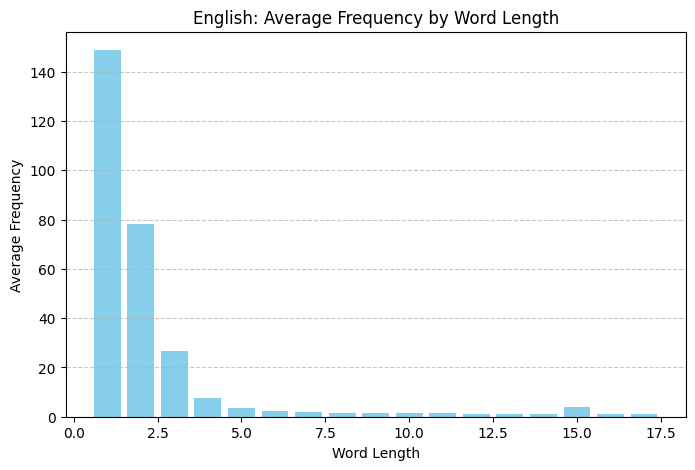

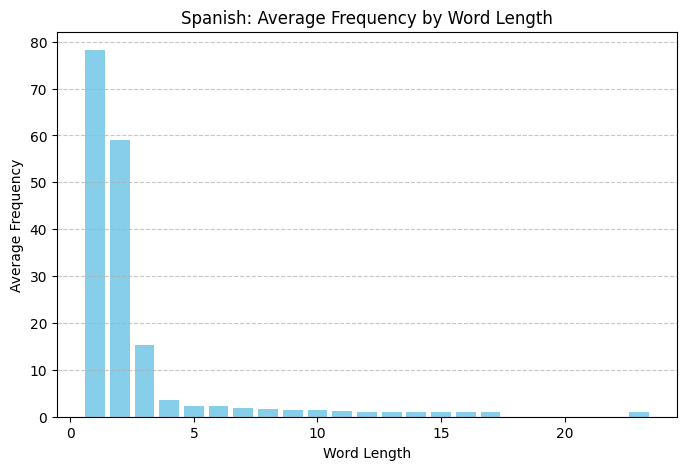

In [ ]:
# English poems
computation_plotting(book_en_words, count_list_en, "English")
# Spanish poems
computation_plotting(book_es_words, count_list_es, "Spanish")

In [ ]:
for word in book_en_words:
    if len(word) == 15:
        print(word)

waltz-quadrille
mountain-height
